# Fall 2024 Data Science Track: Week 5 - Unsupervised Learning

## Packages, Packages, Packages!

Import *all* the things here! You need: `matplotlib`, `networkx`, `numpy`, and `pandas`―and also `ast.literal_eval` to correctly deserialize two columns in the `rules.tsv.xz` file.

If you got more stuff you want to use, add them here too. 🙂

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from ast import literal_eval

# Instacart Association Rules

## Introduction

With the packages out of the way, now you will be working with the Instacart association rules data set, mined from the [Instacart Market Basket Analysis data set](https://www.kaggle.com/c/instacart-market-basket-analysis/data) on Kaggle. [The script](https://github.com/LiKenun/shopping-assistant/blob/main/api/preprocess_instacart_market_basket_analysis_data.py) that does it and the instructions to run it can be found in my [Shopping Assistant Project](https://github.com/LiKenun/shopping-assistant) repository.

## Load the Data

This code has already been pre-written, simply because there are a few quirks which require converters to ensure the correct deserialization of some columns.

In [11]:
rules_data_path = 'data/rules.tsv.xz'

df_rules = pd.read_csv(rules_data_path,
                       sep='\t',
                       quoting=3,
                       converters={
                           'consequent_item': literal_eval,
                           'antecedent_items': literal_eval
                       },
                       low_memory=True)

But just *how* many rules were just loaded‽

In [12]:
# Show the list of column names and the number of rules.
print(df_rules.columns)
print(df_rules.shape[0])



Index(['consequent_item', 'transaction_count', 'item_set_count',
       'antecedent_count', 'consequent_count', 'antecedent_items'],
      dtype='object')
1048575


## Metrics

Compute the support, confidence, and lift of each rule.

* The rule’s *support* tells you how frequently the set of items appears in the dataset. It’s important to prune infrequent sets from further consideration.
    * The simple definition: $$P(A \cap B)$$
    * `= item_set_count / transaction_count`
* The rule’s *confidence* tells you how often a the rule is true. Divide the support for the set of items by the support for just the antecedents. Rules which are not true very often are also pruned.
    * The simple definition: $$\frac{P(A \cap B)}{P(A)}$$
    * `= item_set_count / transaction_count / (antecedent_count / transaction_count)`
    * `= item_set_count / antecedent_count`
* The rule’s *lift* tells you how much more likely the consequent is, given the antecedents, compared to its baseline probability. Divide the support for the set of items by both the support of the antecedents and consequent. Equivalently, divide the confidence by the support of the consequent.
    * The simple definition: $$\frac{P(A \cap B)}{P(A) \cdot P(B)}$$
    * `= item_set_count / transaction_count / (antecedent_count / transaction_count * (consequent_count / transaction_count))`
    * `= item_set_count / antecedent_count / (consequent_count / transaction_count)`
    * `= item_set_count * transaction_count / (antecedent_count * consequent_count)`

In [13]:
print(df_rules.head())

                                     consequent_item  transaction_count  \
0  Total 2% with Raspberry Pomegranate Lowfat Gre...            3346083   
1  Total 2% Lowfat Greek Strained Yogurt With Blu...            3346083   
2   Total 0% with Honey Nonfat Greek Strained Yogurt            3346083   
3                          Total 0% Raspberry Yogurt            3346083   
4                                Pineapple Yogurt 2%            3346083   

   item_set_count  antecedent_count  consequent_count  \
0             101               123               128   
1             101               128               123   
2             101               123               128   
3             101               123               128   
4             101               128               123   

                                    antecedent_items  
0  [Fat Free Blueberry Yogurt, Pineapple Yogurt 2...  
1  [Fat Free Strawberry Yogurt, Total 0% Raspberr...  
2  [Fat Free Blueberry Yogurt, Pineapple 

In [14]:
# Add new columns support, confidence, and lift to df_rules. And show the first 50 rules.
# Compute Support
df_rules['support'] = df_rules['item_set_count'] / df_rules['transaction_count']

# Compute Confidence
df_rules['confidence'] = df_rules['item_set_count'] / df_rules['antecedent_count']

# Compute Lift
df_rules['lift'] = df_rules['confidence'] / (df_rules['consequent_count'] / df_rules['transaction_count'])

# Show the first 50 rules
df_rules.head(50)

#df_rules = # Something goes here.

,consequent_item,transaction_count,item_set_count,antecedent_count,consequent_count,antecedent_items,support,confidence,lift
0,Total 2% with Raspberry Pomegranate Lowfat Gre...,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,0.821138,21465.598514
1,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,0.789062,21465.598514
2,Total 0% with Honey Nonfat Greek Strained Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,0.821138,21465.598514
3,Total 0% Raspberry Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,0.821138,21465.598514
4,Pineapple Yogurt 2%,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,0.789062,21465.598514
5,Fat Free Strawberry Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,0.821138,21465.598514
6,Fat Free Blueberry Yogurt,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,0.789062,21465.598514
7,Total 2% with Raspberry Pomegranate Lowfat Gre...,3346083,101,147,117,"[Blackberry Yogurt, Fat Free Strawberry Yogurt...",0.000030,0.687075,19649.653061
8,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,101,147,117,"[Blackberry Yogurt, Fat Free Strawberry Yogurt...",0.000030,0.687075,19649.653061
9,Total 2% Greek Strained Yogurt with Cherry 5.3 oz,3346083,101,117,147,"[Pineapple Yogurt 2%, Total 0% Raspberry Yogur...",0.000030,0.863248,19649.653061


The yogurts have got some insane lift (*over 9,000*). Why do you think that might be?

*(Write your answer here.)*
Low support means that they cooccur alot but are only a small part of all transactions. the confidence is also high so that and low support increases the lift. 

In [15]:
# Query the rule set if you have to to find out more.
# Look at the support and consequent counts
df_rules[['consequent_item', 'support', 'consequent_count']].sort_values(by='support', ascending=False).head(10)



,consequent_item,support,consequent_count
1033474,Banana,0.146826,491291
1033475,Bag of Organic Bananas,0.118028,394930
1033476,Organic Strawberries,0.082358,275577
1033477,Organic Baby Spinach,0.075224,251705
1033478,Organic Hass Avocado,0.066011,220877
1033479,Organic Avocado,0.055057,184224
1033480,Large Lemon,0.048054,160792
1033481,Strawberries,0.044663,149445
1033482,Limes,0.043830,146660
1033483,Organic Whole Milk,0.042681,142813


## Network Visualization for Consequents with Single Antecedents

Let’s now visualize a small subset of 1,000,000+ rules. First, filter the rule set for the following to whittle it down to something more manageable:

1. The rule must have exactly `1` antecedent item. (There should be 38,684 such rules.)
2. The lift must be between `5` and `20`. (There should be 1,596 such rules, including the prior criterion.)
3. Either the antecedent or consequent of the rule must contain `'Hummus'`, but not both. (This should get you down to 26 rules.)
    * Convert the antecedents `list`-typed column to a `str`-typed column (`antecedent_item`) since there will only be a single antecedent in the subset.
    * Replace any item containing `'Hummus'` to just `'Hummus'`. This will make the visualization more readable later.

Hint: your code may run more efficiently if you re-order certain processing steps.

Assign the subset to `df_rules_subset`.

In [16]:
# Define df_rules_subset.

df_rules_subset = df_rules[df_rules['antecedent_items'].apply(len) == 1]
df_rules_subset = df_rules_subset[(df_rules_subset['lift'] >= 5) & (df_rules_subset['lift'] <= 20)]
df_rules_subset = df_rules_subset[
    (df_rules_subset['antecedent_items'].apply(lambda x: 'Hummus' in x[0])) ^ 
    (df_rules_subset['consequent_item'].str.contains('Hummus'))
]
df_rules_subset['antecedent_item'] = df_rules_subset['antecedent_items'].apply(lambda x: x[0])
df_rules_subset['antecedent_item'] = df_rules_subset['antecedent_item'].replace(to_replace=r'.*Hummus.*', value='Hummus', regex=True)
df_rules_subset['consequent_item'] = df_rules_subset['consequent_item'].replace(to_replace=r'.*Hummus.*', value='Hummus', regex=True)

print(df_rules_subset.shape)

df_rules_subset.head()


(25, 10)


,consequent_item,transaction_count,item_set_count,antecedent_count,consequent_count,antecedent_items,support,confidence,lift,antecedent_item
377756,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,100,887,21405,[Roasted Red Pepper Hummus With Chips],0.000030,0.112740,17.623731,Hummus
387837,Clementines,3346083,174,1334,32194,[Organic Classic Hummus],0.000052,0.130435,13.556738,Hummus
416420,Hummus,3346083,345,1656,74172,[Organic White Pita Bread],0.000103,0.208333,9.398434,Organic White Pita Bread
419119,Hummus,3346083,293,1434,74172,[Organic Whole Wheat Pita],0.000088,0.204324,9.217543,Organic Whole Wheat Pita
422178,Hummus,3346083,331,1655,74172,[Mini Whole Wheat Pita Bread],0.000099,0.200000,9.022496,Mini Whole Wheat Pita Bread


Build a network `graph_rules_subset` from the association rules subset.

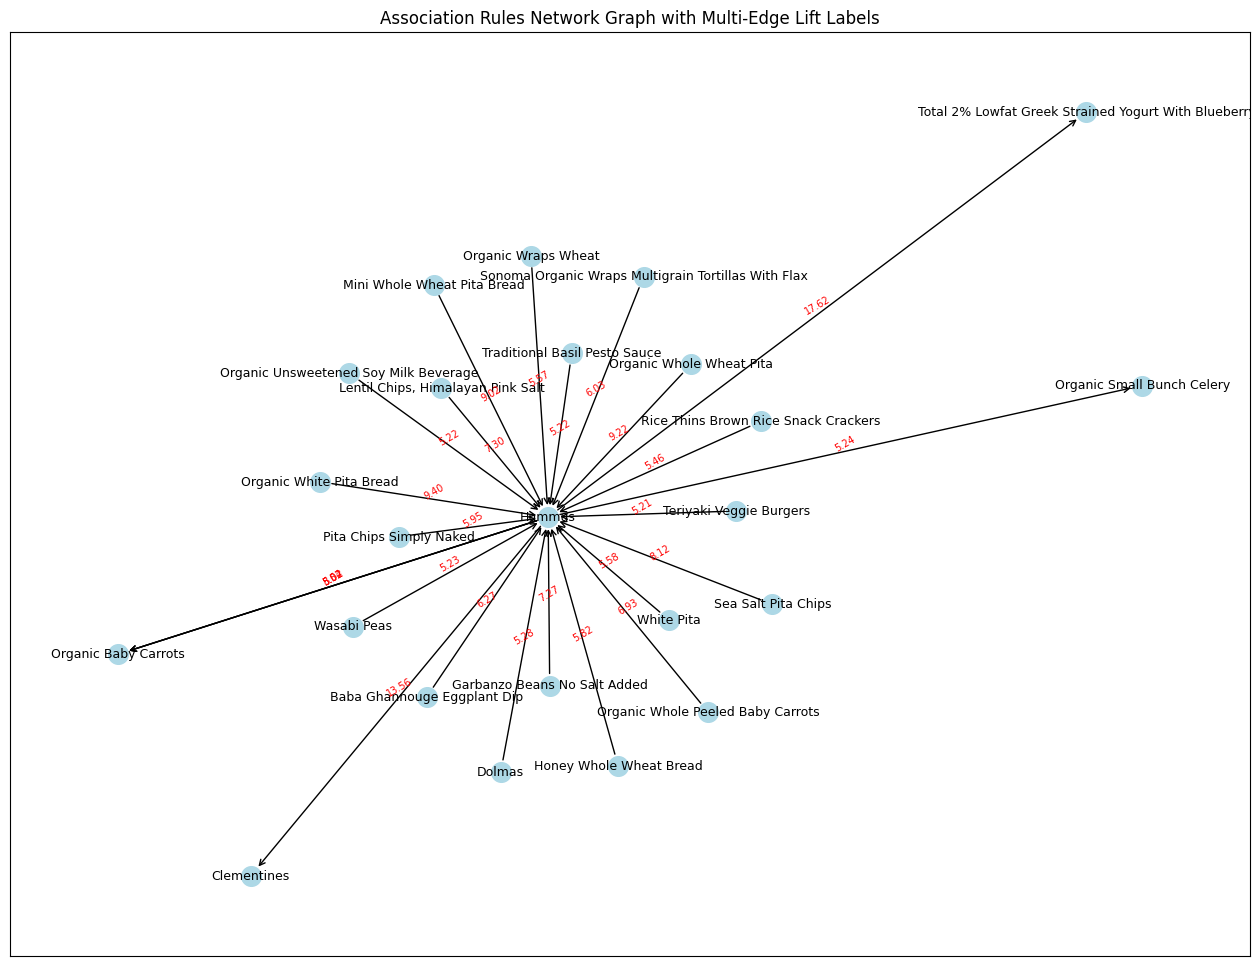

In [24]:
# Define graph_rules_subset, add the graph’s edges, and plot it. You may need a large figure size, smaller node size, and smaller font size.

graph_rules_subset = nx.MultiDiGraph()
graph_rules_subset.add_edges_from([
    (row['antecedent_item'], row['consequent_item'], {
        'support': row['support'],
        'confidence': row['confidence'],
        'lift': row['lift']
    })
    for idx, row in df_rules_subset.iterrows()
])

# Step 3: Define figure size and layout (bigger figure and larger k value for more spread-out nodes)
plt.figure(figsize=(16, 12))  # Larger figure size for better readability
pos = nx.spring_layout(graph_rules_subset, k=0.5, seed=42)  # Increase k for more spread-out nodes

# Draw nodes with smaller sizes
nx.draw_networkx_nodes(graph_rules_subset, pos, node_size=200, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(graph_rules_subset, pos, arrowstyle='->', arrowsize=10)

# Draw node labels with smaller font size
nx.draw_networkx_labels(graph_rules_subset, pos, font_size=9, font_family="sans-serif")

# Manually add edge labels with smaller font size and rotation to avoid clutter
for edge in graph_rules_subset.edges(data=True):
    u, v, edge_data = edge
    lift_value = edge_data['lift']
    
    # Get the position for edge label
    x_mid = (pos[u][0] + pos[v][0]) / 2
    y_mid = (pos[u][1] + pos[v][1]) / 2
    
    # Add rotated text at the midpoint of the edge (rotate to reduce overlap)
    plt.text(x_mid, y_mid, f'{lift_value:.2f}', fontsize=7, color='red', rotation=30, ha='center')


# Step 5: Show the graph
plt.title("Association Rules Network Graph with Multi-Edge Lift Labels")
plt.show()

What can you tell about people who buy hummus?

*(Write your answer here.)* They eat it with anything fr. But mostly the healthy stuff like Pitachips, carrots, (What are they, guineapigs?).

## Make a Prediction

Given that the basket of items contains the following items, use the full set of association rules to predict the next 20 most likely items (consequents) that the person will add to the basket in descending order of lift:

* `'Orange Bell Pepper'`
* `'Organic Red Bell Pepper'`

Hint: a single item in the basket may be a better predictor of some consequents than both items considered together. You must consider both or either, but not neither.

In [27]:
basket = {'Orange Bell Pepper', 'Organic Red Bell Pepper'}

# Filter the association rules where either or both items are in the antecedent
df_predictions = df_rules[df_rules['antecedent_items'].apply(
    lambda x: bool(basket.intersection(set(x)))
)]

# Sort by lift in descending order and select the top 20
df_predictions = df_predictions.sort_values('lift', ascending=False).head(20)

# Display the predicted consequents
df_predictions[['antecedent_items', 'consequent_item', 'lift']]

,antecedent_items,consequent_item,lift
342462,"[Nonfat Icelandic Style Strawberry Yogurt, Ora...",Icelandic Style Skyr Blueberry Non-fat Yogurt,80.202217
345882,"[Non Fat Raspberry Yogurt, Orange Bell Pepper]",Icelandic Style Skyr Blueberry Non-fat Yogurt,71.145298
346832,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,Nonfat Icelandic Style Strawberry Yogurt,68.820769
346901,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,Non Fat Raspberry Yogurt,68.651858
349532,"[Non Fat Raspberry Yogurt, Organic Red Bell Pe...",Icelandic Style Skyr Blueberry Non-fat Yogurt,62.434341
350852,"[Organic Red Bell Pepper, Vanilla Skyr Nonfat ...",Icelandic Style Skyr Blueberry Non-fat Yogurt,59.433078
350991,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,Non Fat Raspberry Yogurt,59.077960
351360,"[Nonfat Icelandic Style Strawberry Yogurt, Org...",Icelandic Style Skyr Blueberry Non-fat Yogurt,58.178302
351433,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,Nonfat Icelandic Style Strawberry Yogurt,57.946047
351881,"[Orange Bell Pepper, Vanilla Skyr Nonfat Yogurt]",Icelandic Style Skyr Blueberry Non-fat Yogurt,56.871965


## Bonus: Other Interesting Findings

Find and share something else interesting about these association rules. It can be a graph, table, or some other format that illustrates your point.

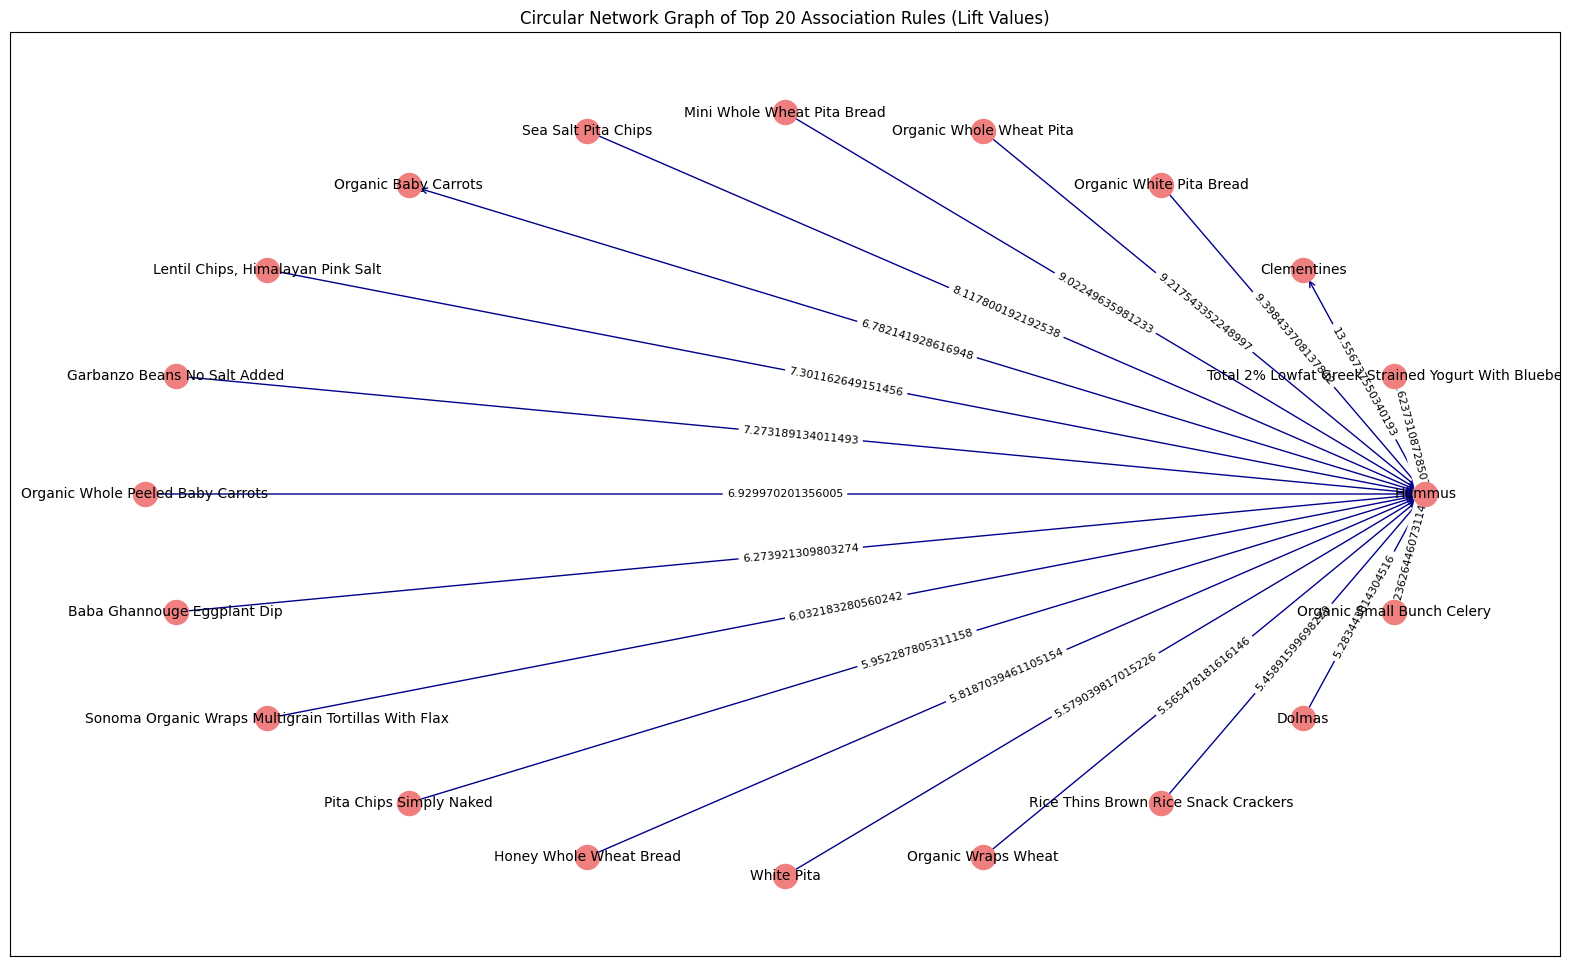

In [30]:
# Step 1: Filter for the top 20 strongest lift rules for better visualization
df_top_lift = df_rules_subset.sort_values('lift', ascending=False).head(20)

# Step 2: Initialize a regular DiGraph (not MultiDiGraph)
graph_circular = nx.DiGraph()

# Step 3: Add edges, collapsing multi-edges by averaging their lift (or keeping the highest lift)
for idx, row in df_top_lift.iterrows():
    u = row['antecedent_item']
    v = row['consequent_item']
    if graph_circular.has_edge(u, v):
        graph_circular[u][v]['lift'] = (graph_circular[u][v]['lift'] + row['lift']) / 2  # Averaging lift
    else:
        graph_circular.add_edge(u, v, lift=row['lift'], confidence=row['confidence'], support=row['support'])

# Step 4: Define figure size and circular layout
plt.figure(figsize=(20, 12))
pos = nx.circular_layout(graph_circular)  # Circular layout for cool visualization

# Draw nodes with color and smaller size
nx.draw_networkx_nodes(graph_circular, pos, node_size=300, node_color='lightcoral')

# Draw edges with color to represent directionality
nx.draw_networkx_edges(graph_circular, pos, arrowstyle='->', arrowsize=10, edge_color='darkblue')

# Draw node labels with appropriate font size
nx.draw_networkx_labels(graph_circular, pos, font_size=10, font_family="sans-serif")

# Add edge labels for lift values
edge_labels = nx.get_edge_attributes(graph_circular, 'lift')
nx.draw_networkx_edge_labels(graph_circular, pos, edge_labels=edge_labels, font_size=8)

# Step 5: Display the graph
plt.title("Circular Network Graph of Top 20 Association Rules (Lift Values)")
plt.show()

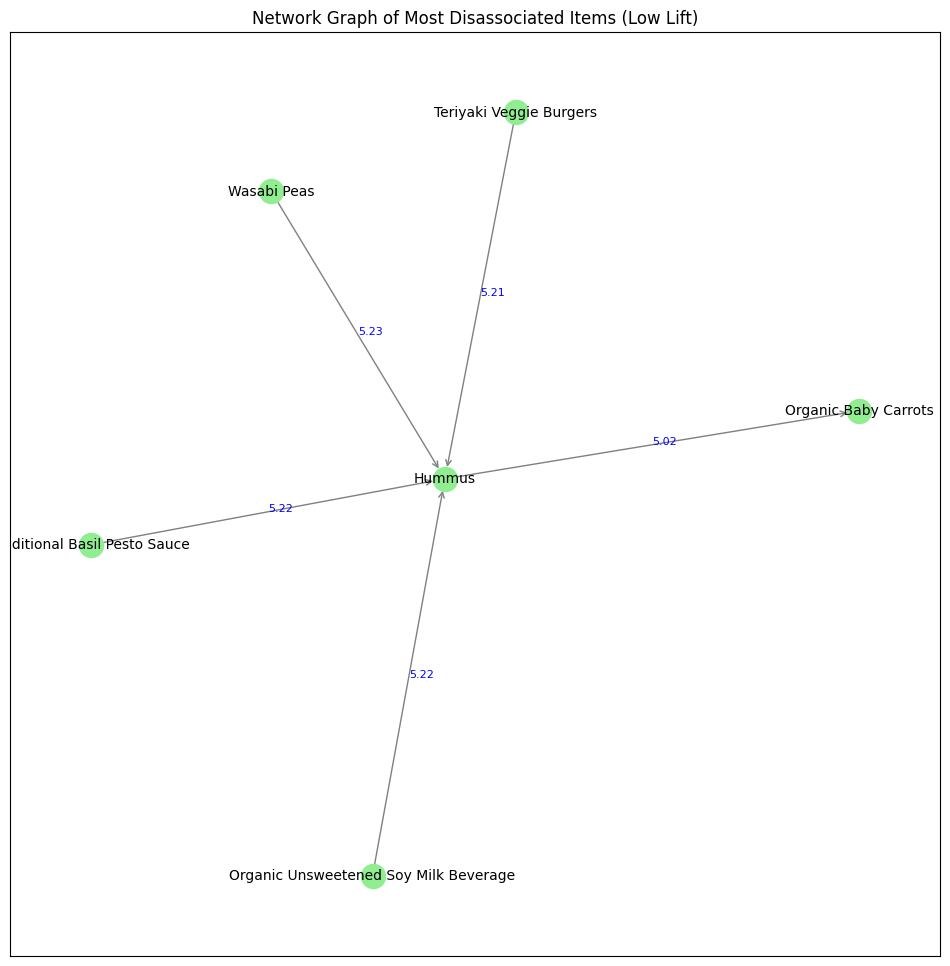

In [32]:
# Step 1: Filter for the bottom 20 rules with the lowest lift values
df_low_lift = df_rules_subset.sort_values('lift', ascending=True).head(5)

# Step 2: Initialize a graph
graph_disassociated = nx.MultiDiGraph()

# Step 3: Add edges to the graph for the most disassociated items
graph_disassociated.add_edges_from([
    (row['antecedent_item'], row['consequent_item'], {
        'support': row['support'],
        'confidence': row['confidence'],
        'lift': row['lift']
    })
    for idx, row in df_low_lift.iterrows()
])

# Step 4: Define figure size and layout (circular or spring layout)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph_disassociated)  # You can try 'circular_layout' for circular arrangement

# Draw nodes with a color and size to highlight them
nx.draw_networkx_nodes(graph_disassociated, pos, node_size=300, node_color='lightgreen')

# Draw edges, with thin lines to represent weak associations (low lift values)
nx.draw_networkx_edges(graph_disassociated, pos, arrowstyle='->', arrowsize=10, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(graph_disassociated, pos, font_size=10, font_family="sans-serif")

# Manually add edge labels to show the lift values
for edge in graph_disassociated.edges(data=True):
    u, v, edge_data = edge  # Get the nodes and edge attributes
    lift_value = edge_data['lift']
    
    # Get the position for edge label (midpoint between u and v)
    x_mid = (pos[u][0] + pos[v][0]) / 2
    y_mid = (pos[u][1] + pos[v][1]) / 2
    
    # Add text at the midpoint of the edge (use plt.text for manual labeling)
    plt.text(x_mid, y_mid, f'{lift_value:.2f}', fontsize=8, color='blue')

# Step 5: Display the graph
plt.title("Network Graph of Most Disassociated Items (Low Lift)")
plt.show()

In [ ]:
# Step 1: Filter for top 20 rules with highest lift
df_top_lift = df_rules_subset.sort_values('lift', ascending=False).head(20)

# Step 2: Display the relevant columns as a table
df_top_lift_table = df_top_lift[['antecedent_items', 'consequent_item', 'support', 'confidence', 'lift']]

# Display the table
import ace_tools as tools; tools.display_dataframe_to_user(name="Top 20 Rules by Lift", dataframe=df_top_lift_table)